In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.ensemble import *

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans

from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA


from sklearn.metrics import *

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''
sns.set_style("white")

# Data Import 

In [3]:
train_df_raw = pd.read_csv('Project2_Train.csv')
display(train_df_raw.head())

test_df_raw = pd.read_csv('Project2_Test.csv')
display(test_df_raw.head())

,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,VehicleDamage,Premium,Vintage,Response,Mystery
0,1,319654,Male,22,46,< 1 Year,Yes,29719,79,0,M3
1,2,298528,Female,40,28,1-2 Year,Yes,29645,99,0,M20
2,3,120858,Male,25,28,1-2 Year,Yes,35996,266,1,M3
3,4,234326,Female,25,29,< 1 Year,No,56899,25,0,M20
4,5,372307,Female,70,28,1-2 Year,No,47452,189,0,M17


,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,Damage,Premium,Vintage,Response,Mystery
0,1,121588,Female,24,28,< 1 Year,Yes,2630,271,0,M1
1,2,44234,Male,23,28,1-2 Year,Yes,40523,244,0,M20
2,3,65903,Male,51,28,1-2 Year,Yes,40951,33,0,M7
3,4,264705,Female,31,46,< 1 Year,Yes,42505,191,0,M9
4,5,364309,Male,51,46,1-2 Year,Yes,38232,151,1,M2


In [4]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   id             10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   Age            10000 non-null  int64 
 4   Region_Code    10000 non-null  int64 
 5   Age.1          10000 non-null  object
 6   VehicleDamage  10000 non-null  object
 7   Premium        10000 non-null  int64 
 8   Vintage        10000 non-null  int64 
 9   Response       10000 non-null  int64 
 10  Mystery        10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB


In [5]:
train_df = train_df_raw.copy()

# Make male = 1 female = 0 
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train_df['VehicleDamage'] = train_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train_df = pd.get_dummies(train_df, columns=['Age.1'])

# Drop mystery 
train_df = train_df.drop('Mystery', axis=1)
train_df = train_df.drop('Unnamed: 0', axis=1)

train_df

,id,Gender,Age,Region_Code,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years
0,319654,1,22,46,1,29719,79,0,0,1,0
1,298528,0,40,28,1,29645,99,0,1,0,0
2,120858,1,25,28,1,35996,266,1,1,0,0
3,234326,0,25,29,0,56899,25,0,0,1,0
4,372307,0,70,28,0,47452,189,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,41,1,2630,31,1,0,1,0
9996,366284,1,43,46,1,28945,66,0,0,0,1
9997,369037,0,46,28,0,2630,286,0,1,0,0
9998,268384,0,21,30,0,23031,155,0,0,1,0


In [6]:
test_df = test_df_raw.copy()

# Make male = 1 female = 0 
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
test_df['Damage'] = test_df['Damage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
test_df = pd.get_dummies(test_df, columns=['Age.1'])

# Drop mystery 
test_df = test_df.drop('Mystery', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

test_df

,id,Gender,Age,Region_Code,Damage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years
0,121588,0,24,28,1,2630,271,0,0,1,0
1,44234,1,23,28,1,40523,244,0,1,0,0
2,65903,1,51,28,1,40951,33,0,1,0,0
3,264705,0,31,46,1,42505,191,0,0,1,0
4,364309,1,51,46,1,38232,151,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,123293,1,49,28,0,33720,161,0,1,0,0
9996,110877,1,43,46,1,23176,171,1,1,0,0
9997,207348,1,36,11,0,2630,16,0,1,0,0
9998,89084,1,36,46,1,26275,230,0,1,0,0


In [7]:
def data_generation(df, features, target):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp[target]
    X = df_temp.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])

# Trying

In [8]:
%%time
features = ['id', 'Gender', 'Age', 'Region_Code', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years']

results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
temp = []
models = []
models.append(('Logistic Regression', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Random Forest', DecisionTreeClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('Naive Bayes', GaussianNB()))

models.append(('Gradient boosting', GradientBoostingClassifier()))
models.append(('Ada boost', AdaBoostClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
#'''
# VOTING
randomfor = RandomForestClassifier()
bagging = BaggingClassifier()
svc_class = SVC()
svm_class = SVC(kernel = 'rbf')
gradboost = GradientBoostingClassifier()


list_models = [('randomfor', randomfor),
               ('bagging', bagging), 
               ('svc_class',svc_class),
               ('svm_class', svm_class),
               ('gradboost', gradboost)
              ]
models.append(('Voting classifier', VotingClassifier(estimators=list_models)))
#'''



for name, model in models:
    model = Pipeline(steps=[("scaler", StandardScaler()),
                            ("mdl", model)])
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    temp.append([name, cv_results.mean(), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'score', 'score_std'])
mdl_performance = mdl_performance.sort_values('score', ascending=False)
mdl_performance

CPU times: user 343 ms, sys: 136 ms, total: 479 ms
Wall time: 29.9 s


,model,score,score_std
0,Logistic Regression,0.870597,0.000684
3,Support Vector Classifier,0.870597,0.000684
4,Support Vector Machines,0.870597,0.000684
5,MLP,0.870597,0.000684
12,Voting classifier,0.870299,0.000448
10,Ada boost,0.870000,0.003232
9,Gradient boosting,0.869701,0.002008
1,Random Forest,0.864627,0.002913
11,Bagging classifier,0.855224,0.007342
6,K Neigbor Classifier,0.849104,0.007797


# Logistic Regression 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.860909090909091
              precision    recall  f1-score   support

 not popular       0.96      0.69      0.80      2841
     popular       0.30      0.83      0.44       459

    accuracy                           0.71      3300
   macro avg       0.63      0.76      0.62      3300
weighted avg       0.87      0.71      0.75      3300



<Figure size 1152x648 with 0 Axes>

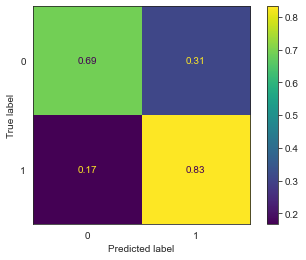

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.202442, G-Mean=0.754


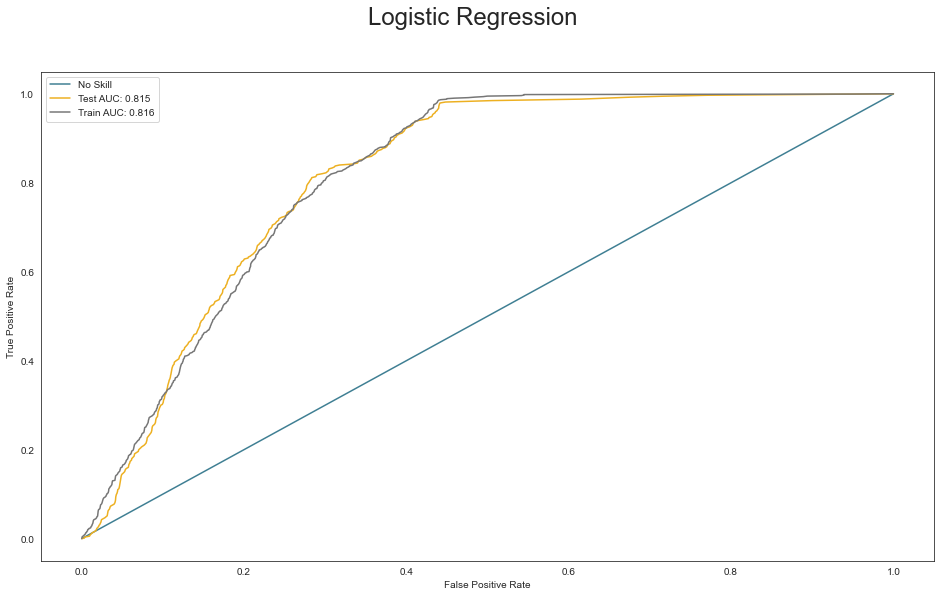

CPU times: user 2.38 s, sys: 140 ms, total: 2.52 s
Wall time: 1.25 s


In [9]:
%%time
features = ['id', 'Gender', 'Age', 'Region_Code', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years']

X_train, X_test, y_train, y_test = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression(penalty='none'))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['not popular', 'popular']))

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
cm  =confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = ConfusionMatrixDisplay(cm_norm).plot()

plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show() 

# Choosing a model 

In [15]:
%%time
results = []
names = []

#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('Logistic', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostClassifier()))
models.append(('Gradient boosting', GradientBoostingClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
# VOTING
logistic = LogisticRegression()
svc = SVC()
svm = SVC(kernel = 'rbf')
mlp = MLPClassifier(alpha=1, max_iter=1000)

list_models = [('logistic', logistic),
               ('svc', svc), 
               ('svm', svm),
               ('mlp', mlp)
              ]
models.append(('Voting regressor', VotingClassifier(estimators=list_models)))


for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'Accuracy', 'Accuracy_std'])
mdl_performance = mdl_performance.sort_values('Accuracy', ascending=False)
mdl_performance

CPU times: user 63.5 ms, sys: 10.3 ms, total: 73.8 ms
Wall time: 6.4 s


,model,Accuracy,Accuracy_std
0,Logistic,0.870597,0.000149
4,Support Vector Classifier,0.870597,0.000149
5,Support Vector Machines,0.870597,0.000149
6,MLP,0.870597,0.000149
10,Voting regressor,0.870597,0.000149
8,Gradient boosting,0.868507,0.000149
7,Ada boost,0.867164,0.000597
1,Random Forest,0.861194,0.001493
3,K Neigbor Classifier,0.849552,0.001493
9,Bagging classifier,0.847612,0.000448
